In [1]:
# Imports needed for the project
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pickle

In [2]:
# ALREADY DONE.
""" 
# Start by dropping the status and previously sold columns
df = pd.read_csv("data/realtor-data.csv")

# Drop the unwanted columns
df.drop(columns=["status", "prev_sold_date"], axis=1, inplace=True)

# Overwrite csv data
df.to_csv('data/realtor-data.csv', index=False)
"""

' \n# Start by dropping the status and previously sold columns\ndf = pd.read_csv("data/realtor-data.csv")\n\n# Drop the unwanted columns\ndf.drop(columns=["status", "prev_sold_date"], axis=1, inplace=True)\n\n# Overwrite csv data\ndf.to_csv(\'data/realtor-data.csv\', index=False)\n'

In [3]:
# Read the data
df = pd.read_csv("data/realtor-data.csv")

In [4]:
# See how many unknowns
missing_values_count = df.isna().sum()

# Print the count of missing values for each column
print(missing_values_count)

bed           216528
bath          194213
acre_lot      357467
city             191
state              0
zip_code         479
house_size    450112
price            108
dtype: int64


In [5]:
# Drop any NA data. This is fine for a personal project
df.dropna(inplace=True)

In [6]:
# Set X and Y
X = df.drop(columns=["price", "city"], axis=1)
y = df["price"]

In [7]:
X

,bed,bath,acre_lot,state,zip_code,house_size
0,3.0,2.0,0.12,Puerto Rico,601.0,920.0
1,4.0,2.0,0.08,Puerto Rico,601.0,1527.0
2,2.0,1.0,0.15,Puerto Rico,795.0,748.0
3,4.0,2.0,0.10,Puerto Rico,731.0,1800.0
5,4.0,3.0,0.46,Puerto Rico,612.0,2520.0
...,...,...,...,...,...,...
1401060,3.0,1.0,0.10,New York,14048.0,1002.0
1401062,4.0,2.0,0.36,New York,14136.0,2026.0
1401063,10.0,4.0,0.43,New York,14716.0,4802.0
1401064,2.0,2.0,0.14,New York,14048.0,1568.0


In [8]:
# Perform one-hot encoding
X_encoded = pd.get_dummies(X, columns=['state'])


In [9]:
# Drop the original 'state' column
X_encoded

,bed,bath,acre_lot,zip_code,house_size,state_Connecticut,state_Delaware,state_Maine,state_Massachusetts,state_New Hampshire,state_New Jersey,state_New York,state_Pennsylvania,state_Puerto Rico,state_Rhode Island,state_Vermont,state_Virgin Islands,state_West Virginia,state_Wyoming
0,3.0,2.0,0.12,601.0,920.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,4.0,2.0,0.08,601.0,1527.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,2.0,1.0,0.15,795.0,748.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,4.0,2.0,0.10,731.0,1800.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False
5,4.0,3.0,0.46,612.0,2520.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401060,3.0,1.0,0.10,14048.0,1002.0,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1401062,4.0,2.0,0.36,14136.0,2026.0,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1401063,10.0,4.0,0.43,14716.0,4802.0,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1401064,2.0,2.0,0.14,14048.0,1568.0,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [11]:
# Create list for the results
valScores = []
models = []
testScores = []



In [12]:
# Perform CV on models
for k in range(1, 11):
    # Create and train model
    knnModel = KNeighborsRegressor(n_neighbors=k)
    knnModel.fit(X_encoded, y)
    
    # Predict on testing set
    y_pred = knnModel.predict(X_test)
    
    # Find MSE of testing set
    mse = mean_squared_error(y_test, y_pred)
    
    # Run 5 fold CV
    scores = cross_val_score(knnModel, X_train, y_train, cv=5)

    # Store scores, models, and test scores
    valScores.append(np.mean(scores))
    models.append(knnModel)
    testScores.append(mse)
    print(k)

1
2
3
4
5
6
7
8
9
10


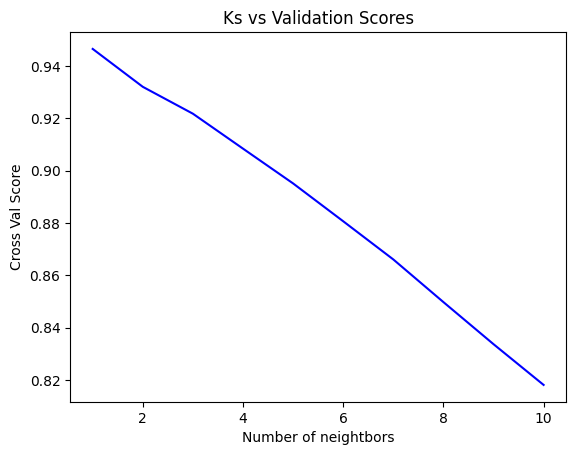

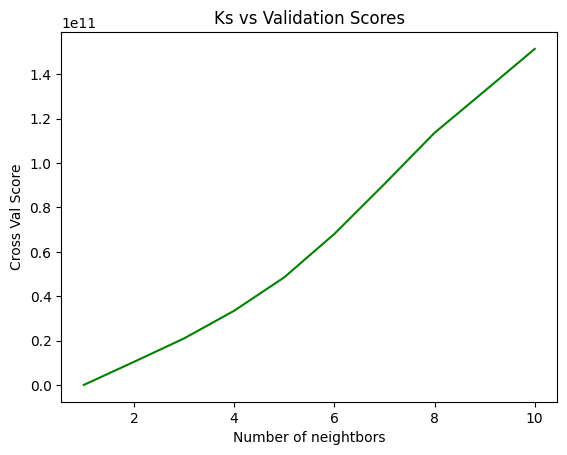

In [20]:
Ks = range(1, 11)
plt.plot(Ks, valScores, color="blue")
plt.title("Ks vs Validation Scores")
plt.xlabel("Number of neightbors")
plt.ylabel("Cross Val Score")
plt.show()


plt.plot(Ks, testScores, color="green")
plt.title("Ks vs Validation Scores")
plt.xlabel("Number of neightbors")
plt.ylabel("Cross Val Score")
plt.show()

In [22]:
# k = 1 produces the best model
bestK = 1

In [23]:
polyValScores = []
polyModels = []
polyTestMSE = []

for degree in range(1, 11):
    # Initailize linReg and polyFeatures object
    polyFeatures = PolynomialFeatures(degree=degree)
    linReg = LinearRegression()
    
    # Create a pipeline
    pipeline = make_pipeline(polyFeatures, linReg)
    
    # Run cross validation on model
    cvScores = cross_val_score(pipeline, X_train, y_train)
    
    
    # Predict y values
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    
    polyModels.append(pipeline)
    polyValScores.append(np.mean(cvScores))
    polyTestMSE.append(mean_squared_error(y_test, y_pred))
    print(degree)

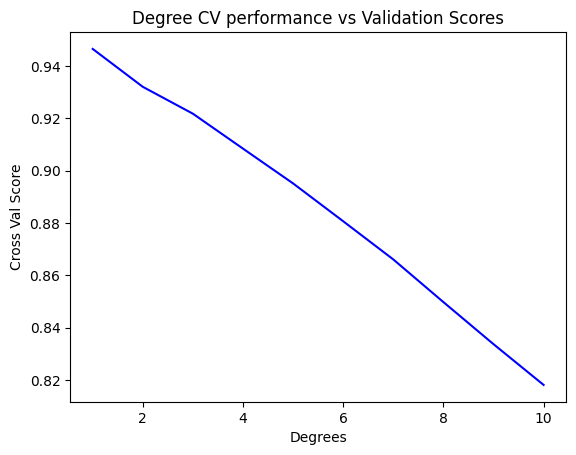

NameError: name 'polyValScores' is not defined

In [ ]:
degrees = range(1, 11)

plt.plot(degrees, polyValScores, color="blue")
plt.title("Degree CV performance vs Validation Scores")
plt.xlabel("Degrees")
plt.ylabel("Cross Val Score")
plt.show()

plt.plot(degrees, polyTestMSE, color="orange")
plt.title("Degree test performance vs Validation Scores")
plt.xlabel("Cross Val Score")
plt.ylabel("Test MSE Score")
plt.show()